### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [ ]:
%pip install mlxtend==0.23.1

^ moved up here so we dont have to run it again

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
url = r'https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx'
df = pd.read_excel(url)

### EDA

In [3]:
df.head()

,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [5]:
df.describe()

,KDSUP,KAS,KDSLS,ITEM,BIN,KDBIN,NO_ORD,SLD_AK,SLD_AKG,QTY,...,PPNBM_OLD,JLH_TRANS,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,FILLER,SUPPLIER,DEP_SWA,LAMA_CRD
count,40832.000000,136294.000000,0.0,148486.000000,13586.000000,0.0,0.0,11769.000000,9350.000000,148486.000000,...,9350.000000,1.484860e+05,0.0,0.0,0.0,0.0,1.484860e+05,7264.000000,1668.000000,37.0
mean,650.873384,4.497381,NaN,21322.181445,8.858531,NaN,NaN,20.819228,15.819209,3.163174,...,0.001176,6.137361e+04,NaN,NaN,NaN,NaN,1.717615e+11,313.185573,1.182854,0.0
std,467.837803,1.906136,NaN,25881.022963,4.537190,NaN,NaN,70.033381,54.576439,16.266576,...,0.095344,3.981378e+05,NaN,NaN,NaN,NaN,2.951083e+10,463.993685,0.386662,0.0
min,0.000000,1.000000,NaN,1.000000,1.000000,NaN,NaN,-12.000000,-12.000000,1.000000,...,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,1.701010e+11,0.000000,1.000000,0.0
25%,30.000000,3.000000,NaN,5221.000000,6.000000,NaN,NaN,0.000000,0.000000,1.000000,...,0.000000,5.800000e+03,NaN,NaN,NaN,NaN,1.701077e+11,8.000000,1.000000,0.0
50%,999.000000,5.000000,NaN,13839.000000,8.000000,NaN,NaN,3.000000,2.000000,1.000000,...,0.000000,1.270000e+04,NaN,NaN,NaN,NaN,1.701160e+11,69.000000,1.000000,0.0
75%,999.000000,6.000000,NaN,35802.750000,13.000000,NaN,NaN,13.000000,11.000000,2.000000,...,0.000000,3.060000e+04,NaN,NaN,NaN,NaN,1.701251e+11,444.000000,1.000000,0.0
max,1769.000000,15.000000,NaN,700047.000000,19.000000,NaN,NaN,2663.000000,1748.000000,2000.000000,...,9.000000,3.778570e+07,NaN,NaN,NaN,NaN,7.013157e+11,1769.000000,2.000000,0.0


In [6]:
df.isnull().sum()

KD_SBR           3
TP_TRN           3
KDSUP       107657
KAS          12195
TRN_DK           3
             ...  
TP_ADJ        9413
USER             3
TANGGAL          3
JAM              3
LAMA_CRD    148452
Length: 61, dtype: int64

### Visualization

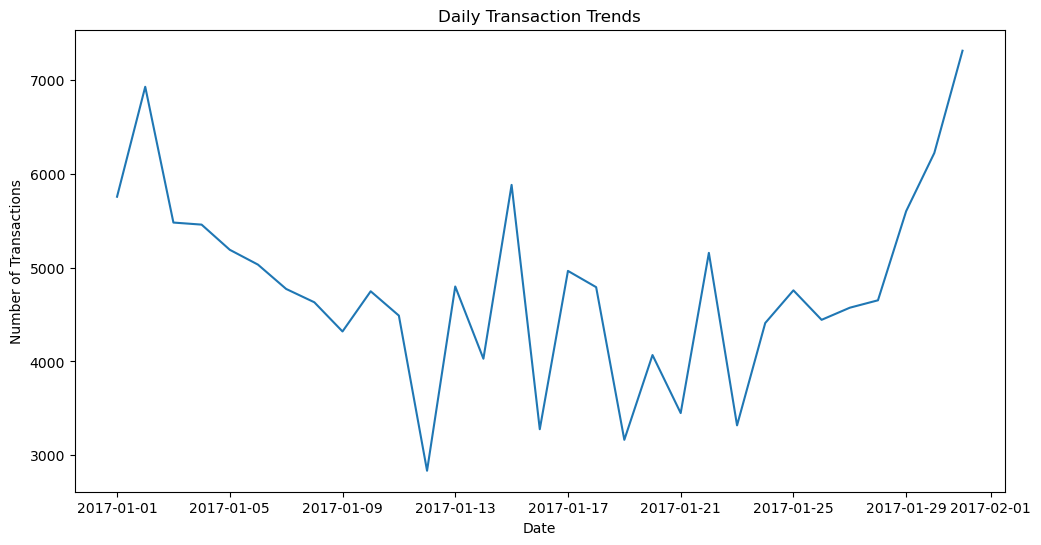

In [9]:
df["TGL_TRANS"] = pd.to_datetime(df["TGL_TRANS"], format = "%d-%m-%Y %H:%M")
df['TGL_TRANS'] = pd.to_datetime(df['TGL_TRANS']).dt.date


daily_transactions = df.groupby('TGL_TRANS')['NO_BKT'].count().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_transactions['TGL_TRANS'], daily_transactions['NO_BKT'])
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Trends')
plt.show()

In [11]:
df['TGL_TRANS'] = pd.to_datetime(df['TGL_TRANS'], errors='coerce')
df['Days'] = df['TGL_TRANS'].dt.day_name()
daily_transactions_count = df.groupby('Days').size().reset_index(name='Transaction_Count')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_transactions_count['Days'] = pd.Categorical(daily_transactions_count['Days'], categories=day_order, ordered=True)
daily_transactions_count = daily_transactions_count.sort_values('Days')
daily_transactions_count

,Days,Transaction_Count
1,Monday,24061
5,Tuesday,26908
6,Wednesday,19493
4,Thursday,15633
0,Friday,18469
2,Saturday,16902
3,Sunday,27020


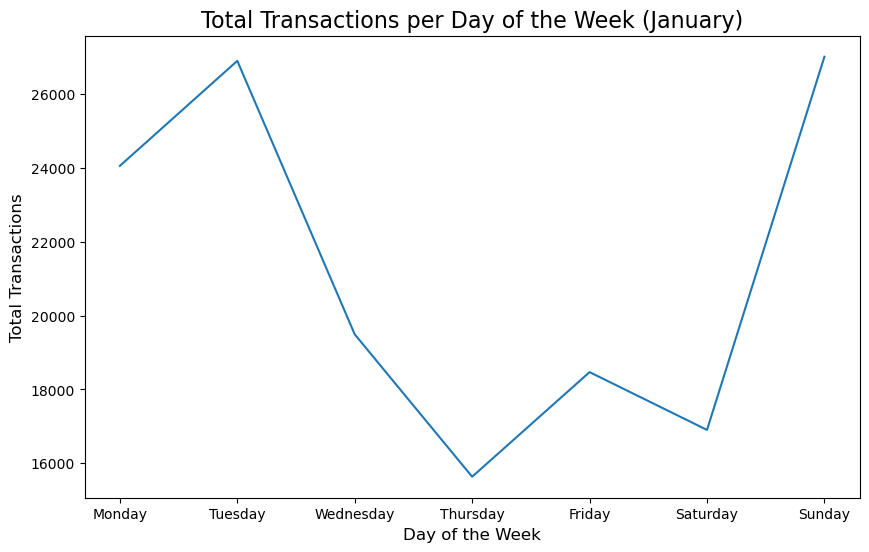

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Days', y='Transaction_Count', data=daily_transactions_count)
plt.title('Total Transactions per Day of the Week (January)', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)
plt.show()

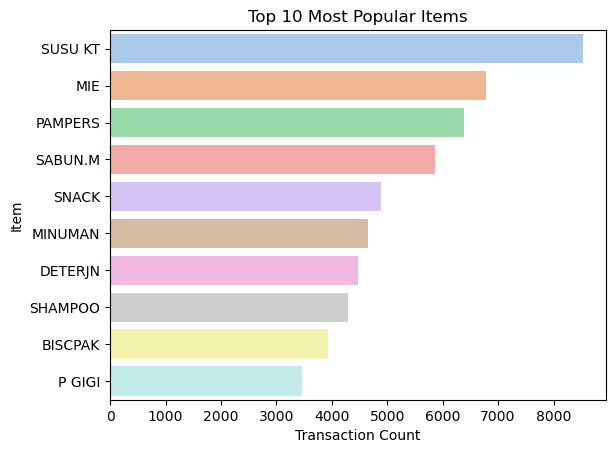

In [16]:
item_popularity = df['KEL'].value_counts().reset_index()
item_popularity.columns = ['KEL', 'NO_BKT']
top_items = item_popularity.head(10)

sns.barplot(x='NO_BKT', y='KEL', data=top_items, palette='pastel')
plt.title('Top 10 Most Popular Items')
plt.xlabel('Transaction Count')
plt.ylabel('Item')
plt.show()

### Apriori

In [17]:
basket = df.groupby(['NO_BKT','KEL'])['KEL'].count().unstack().reset_index().fillna(0).set_index('NO_BKT')
basket.head()

KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0003/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0005/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
basket = df.pivot_table(index='NO_BKT', columns='KEL', aggfunc='size', fill_value=0)
basket[basket > 1] = 1
basket

KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)
frequent_itemsets

c:\Users\Belinda\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.037991,(AIR.M)
1,0.032251,(ASESORS)
2,0.033590,(B DAPUR)
3,0.063600,(BISCPAK)
4,0.024106,(BTL/DOT)
5,0.032360,(COKLAT)
6,0.026593,(DDORANT)
7,0.083607,(DETERJN)
8,0.028507,(GULA)
9,0.021373,(HBL)


### Market Basket Analysis Insights
**1. Top Products**
These are the most frequently purchased items, based on support:

- SUSU KT (16.65%): Indicates high demand for powdered milk, likely a staple item for many households.
- PAMPERS (13.97%): A key item for families with infants, essential for daily use.
- MINUMAN (9.19%): Beverages are highly consumed, possibly spanning bottled water, soft drinks, or juices.
- MIE (7.89%): Instant noodles, often associated with convenience and affordability.

**2. Complementary Itemsets**
Using the association rules:

***Bathroom Essentials:***
- SABUN.M (soap) and P GIGI (toothpaste) have a strong association (support: 4.09%).
SABUN.M, SHAMPOO, and P GIGI as a trio (support: 2.42%) suggest they are often purchased together.
Laundry Products:

- DETERJN (detergent) and SOFTENR (fabric softener) (support: 2.76%) indicate customers value bundled laundry solutions.

***Childcare Products:***
- PAMPERS pairs well with:
SABUN.M (support: 2.31%): Likely reflecting purchase patterns of baby-care products.

- SHAMPOO (support: 2.12%): Baby-specific shampoos are a possible complement.
Food Pairings:

- SNACK and BISCPAK (support: 2.20%): Indicates a preference for variety in snack purchases.

- MIE (noodles) and DETERJN (detergent) (support: 2.32%): This could reflect purchase patterns for low-income or single-person households balancing essentials.

**Placement Ideas (Layout Recommendations)**
1. High-Traffic Zones for High-Demand Items

- Place SUSU KT (powdered milk) and PAMPERS (diapers) in prominent areas near store entrances. These are essential items that draw foot traffic and ensure customers encounter other products on their way to these sections.

2. Thematic Zones for Cross-Selling

***Bathroom Essentials:***
- Arrange SABUN.M, SHAMPOO, P GIGI, and TISSUE in the same aisle.
- Place complementary impulse items like SIKAT G (toothbrush) at the aisle ends to encourage bundled purchases.

***Laundry Zone:***
- Group DETERJN and SOFTENR, adding TISSU B (bulk tissue) nearby, as bulk tissue is often bought by families managing household supplies.
3. Convenience and Impulse Buys

***Quick Meals:***
- Group MIE (noodles), MINUMAN (beverages), and COKLAT (chocolates) to create a quick meal/snack zone. Highlight combos or discounts like "Buy 2 instant noodles and get 1 beverage free."

***Checkout Counter:***
- Place small, high-margin products like PERMEN (candies), WALLS (ice cream), and WAFER.P (wafer snacks) near checkout counters to encourage last-minute impulse purchases.

4. Targeted Family and Childcare Zones
- Combine PAMPERS, SUSU KL (liquid milk), SHAMPOO, and SABUN.M into a childcare zone. Include related items like BTL/DOT (bottles) for a comprehensive offering.

5. Seasonal and Promotional Placement
- Use temporary promotional endcaps or displays for items like WALLS (ice cream) during summer or PERMEN during festive seasons.

**Examples**
***Example 1:*** Grouping Bathroom Products
If SHAMPOO, SABUN.M, and P GIGI are often bought together:
- Reason: These are daily-use items, and customers prefer to get all bathroom essentials in one trip.
- Action: Place these items together in one aisle to make shopping convenient.

***Example 2:*** Bundling Laundry Items
If DETERJN and SOFTENR are frequently bought together:
- Reason: These products complement each other in the laundry process.
- Action: Place them side-by-side and offer discounts, such as "Buy detergent and get 10% off fabric softener."

***Example 3:*** Snacks and Beverages
If SNACK and BISCPAK are associated:
- Reason: Customers may be preparing for gatherings or want variety in their snack choices.
Action: Create a snack corner with both items and add beverages like MINUMAN to encourage larger basket sizes.


**Strategic Takeaways**
- Convenience Matters: Logical groupings save time for customers, increasing satisfaction and the likelihood of repeat purchases.
- Cross-Selling Opportunities: Highlight complementary products through layout and promotions.
- Monitor and Iterate: Use data to refine layouts over time, based on customer behavior and sales trends.